In [1]:
from IPython.display import clear_output
clear_output()

In [2]:
import shutil

# Try to remove the tree; if it fails, throw an error using try...except.
try:
    shutil.rmtree("/content/sample_data")
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [3]:
# Clone from Github Repository
! git init .
! git remote add origin https://github.com/RichardMinsooGo-ML/Bible_4_Part_K_05_Masked_R_CNN.git
# ! git remote add origin https://github.com/Okery/PyTorch-Simple-MaskRCNN.git
# ! git pull origin master
! git pull origin main


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 56 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), 34.41 KiB | 1.91 MiB/s, done.
From https://github.com/RichardMinsooGo-ML/Bible_4_Part_K_05_Masked_R_CNN
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main


In [4]:
! mkdir dataset

In [5]:
# VOC 2012 Dataset Download and extract

! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf "/content/VOCtrainval_11-May-2012.tar" -C "/content/dataset"
clear_output()

In [ ]:
"""
! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

!tar -xvf "/content/VOCtrainval_06-Nov-2007.tar" -C "/content/dataset"
!tar -xvf "/content/VOCtest_06-Nov-2007.tar" -C "/content/dataset"
clear_output()
"""

In [6]:
# This code is not generalized yet. So, it need to rename the files
import os

old_name = r"/content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt"
new_name = r"/content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/train2017.txt"
os.rename(old_name, new_name)

old_name = r"/content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt"
new_name = r"/content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/val2017.txt"
os.rename(old_name, new_name)


In [7]:
! python train.py --use-cuda --epochs 50 --iters 200 --dataset voc --data-dir /content/dataset/VOCdevkit/VOC2012

cuda: True
available GPU(s): 1
0: {'name': 'Tesla T4', 'capability': [7, 5], 'total_momory': 14.75, 'sm_count': 40}

device: cuda
Checking the dataset...
checked id file: /content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/checked_train2017.txt
1463 samples are OK; 4.7 seconds
Checking the dataset...
checked id file: /content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/checked_val2017.txt
1444 samples are OK; 4.3 seconds
Namespace(use_cuda=True, dataset='voc', data_dir='/content/dataset/VOCdevkit/VOC2012', ckpt_path='./maskrcnn_voc.pth', results='./maskrcnn_results.pth', seed=3, lr_steps=[6, 7], lr=0.00125, momentum=0.9, weight_decay=0.0001, epochs=50, iters=200, print_freq=100, warmup_iters=1463)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_ut

# Demo - Image

In [8]:
# This code is not generalized yet. So, it need to rename the files
old_name = r"/content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/val2017.txt"
new_name = r"/content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt"
os.rename(old_name, new_name)



In [9]:
! mkdir image

cuda: True
available GPU(s): 1
0: {'name': 'Tesla T4', 'capability': [7, 5], 'total_momory': 14.75, 'sm_count': 40}

device: cuda
Checking the dataset...
checked id file: /content/dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/checked_val.txt
1444 samples are OK; 4.3 seconds


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.307
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.608
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.399
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.402
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.404
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.031
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.308
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.506
IoU metric: segm
 Avera

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


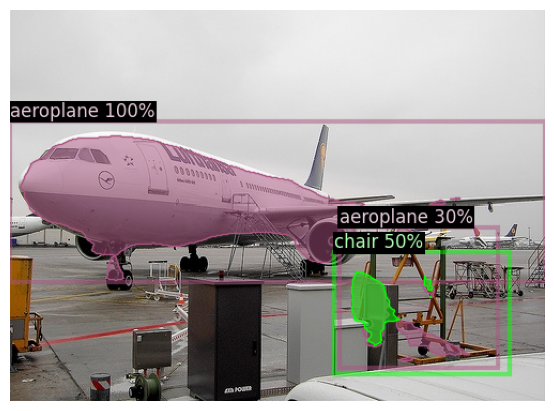

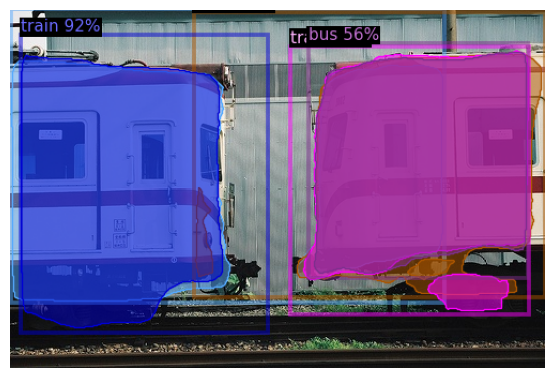

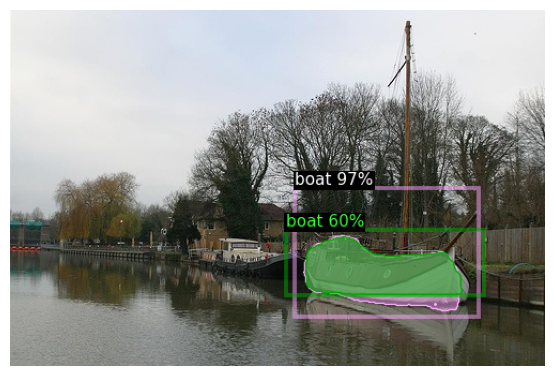

In [10]:
import torch
import pytorch_mask_rcnn as pmr


use_cuda = True
dataset = "voc"
ckpt_path = "/content/maskrcnn_voc-50.pth"
data_dir  = "/content/dataset/VOCdevkit/VOC2012"

device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
if device.type == "cuda":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "val", train=True)
#indices = torch.randperm(len(ds)).tolist()
#d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=False)

model = pmr.maskrcnn_resnet50(True, max(ds.classes) + 1).to(device)
model.eval()
model.head.score_thresh = 0.3

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint

for p in model.parameters():
    p.requires_grad_(False)

iters = 3

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    #target = {k: v.to(device) for k, v in target.items()}

    with torch.no_grad():
        result = model(image)

    pmr.show(image, result, ds.classes, "./image/output{}.jpg".format(i))

    if i >= iters - 1:
        break

# Evaluation - voc

In [19]:
! python eval.py --ckpt-path /content/maskrcnn_voc-50.pth \
                 --dataset voc \
                 --data-dir /content/dataset/VOCdevkit/VOC2012

Namespace(dataset='voc', data_dir='/content/dataset/VOCdevkit/VOC2012', ckpt_path='/content/maskrcnn_voc-50.pth', iters=3, use_cuda=True, results='/content/maskrcnn_results.pth')
cuda: True
available GPU(s): 1
0: {'name': 'Tesla T4', 'capability': [7, 5], 'total_momory': 14.75, 'sm_count': 40}

device: cuda
Namespace(dataset='voc', data_dir='/content/dataset/VOCdevkit/VOC2012', ckpt_path='/content/maskrcnn_voc-50.pth', iters=3, use_cuda=True, results='/content/maskrcnn_results.pth')
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`

# COCO Dataset Train and test

In [12]:

! wget http://images.cocodataset.org/zips/train2017.zip
! wget http://images.cocodataset.org/zips/val2017.zip
# ! wget http://images.cocodataset.org/zips/test2017.zip
# ! wget http://images.cocodataset.org/zips/unlabeled2017.zip


! unzip train2017.zip  -d dataset/COCO2017
! unzip val2017.zip  -d dataset/COCO2017
clear_output()

# ! unzip test2017.zip
# clear_output()

# ! unzip unlabeled2017.zip
# clear_output()

# ! rm train2017.zip
# ! rm val2017.zip
# ! rm test2017.zip
# ! rm unlabeled2017.zip

! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
# wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
# wget http://images.cocodataset.org/annotations/image_info_test2017.zip
# wget http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip

! unzip annotations_trainval2017.zip -d dataset/COCO2017
# ! unzip stuff_annotations_trainval2017.zip
# ! unzip image_info_test2017.zip
# ! unzip image_info_unlabeled2017.zip

# ! rm annotations_trainval2017.zip
# ! rm stuff_annotations_trainval2017.zip
# ! rm image_info_test2017.zip
# ! rm image_info_unlabeled2017.zip


--2024-01-12 02:20:04--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.203.41, 54.231.225.129, 52.217.192.17, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.203.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.2MB/s    in 2.5s    

2024-01-12 02:20:06 (96.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: dataset/COCO2017/annotations/instances_train2017.json  
  inflating: dataset/COCO2017/annotations/instances_val2017.json  
  inflating: dataset/COCO2017/annotations/captions_train2017.json  
  inflating: dataset/COCO2017/annotations/captions_val2017.json  
  inflating: dataset/COCO2017/annotations/person_keypoints_train2017.json  
  infl

In [13]:
! python train.py --use-cuda --epochs 50 --iters 200 --dataset coco --data-dir dataset/COCO2017

cuda: True
available GPU(s): 1
0: {'name': 'Tesla T4', 'capability': [7, 5], 'total_momory': 14.75, 'sm_count': 40}

device: cuda
loading annotations into memory...
Done (t=15.84s)
creating index...
index created!
Checking the dataset...
checked id file: dataset/COCO2017/checked_train2017.txt
117266 samples are OK; 402.0 seconds
loading annotations into memory...
Done (t=0.47s)
creating index...
index created!
Checking the dataset...
checked id file: dataset/COCO2017/checked_val2017.txt
4952 samples are OK; 17.3 seconds
Namespace(use_cuda=True, dataset='coco', data_dir='dataset/COCO2017', ckpt_path='./maskrcnn_coco.pth', results='./maskrcnn_results.pth', seed=3, lr_steps=[6, 7], lr=0.00125, momentum=0.9, weight_decay=0.0001, epochs=50, iters=200, print_freq=100, warmup_iters=117266)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  w

In [15]:
# This code is not generalized yet. So, it need to rename the files
old_name = r"/content/dataset/COCO2017/annotations/instances_val2017.json"
new_name = r"/content/dataset/COCO2017/annotations/instances_val.json"
os.rename(old_name, new_name)

In [16]:
# This code is not generalized yet. So, it need to rename the files
old_name = r"/content/dataset/COCO2017/val2017"
new_name = r"/content/dataset/COCO2017/val"
os.rename(old_name, new_name)

In [17]:
import torch
import pytorch_mask_rcnn as pmr

use_cuda = True
dataset = "coco"
ckpt_path = "/content/maskrcnn_coco-50.pth"
data_dir  = "/content/dataset/COCO2017"

device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
if device.type == "cuda":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "val", train=True)
#indices = torch.randperm(len(ds)).tolist()
#d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=False)

model = pmr.maskrcnn_resnet50(True, max(ds.classes) + 1).to(device)
model.eval()
model.head.score_thresh = 0.3

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint

for p in model.parameters():
    p.requires_grad_(False)

iters = 3

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    #target = {k: v.to(device) for k, v in target.items()}

    with torch.no_grad():
        result = model(image)

    pmr.show(image, result, ds.classes, "./image/output{}.jpg".format(i))

    if i >= iters - 1:
        break

Output hidden; open in https://colab.research.google.com to view.

cuda: True
available GPU(s): 1
0: {'name': 'Tesla T4', 'capability': [7, 5], 'total_momory': 14.75, 'sm_count': 40}

device: cuda
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
Checking the dataset...
checked id file: /content/dataset/COCO2017/checked_val.txt
4952 samples are OK; 17.0 seconds


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.236
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.425
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.447
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.278
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.533
IoU metric: segm
 Avera

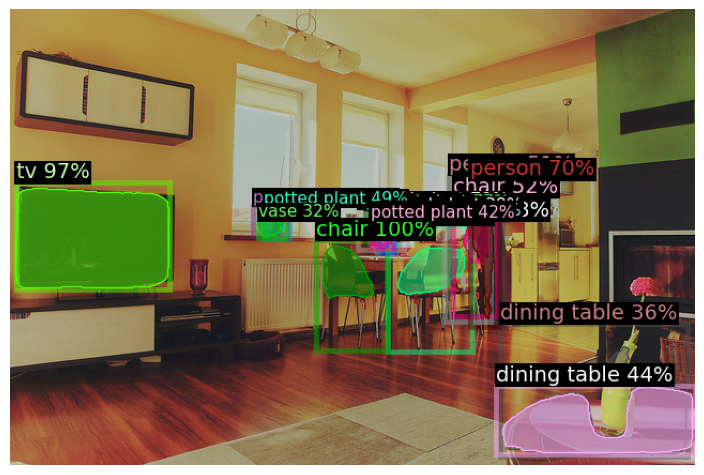

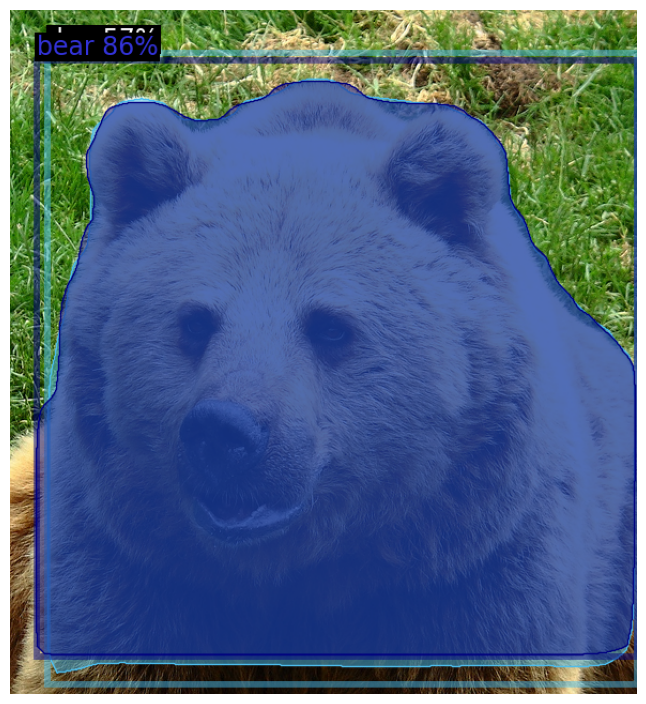

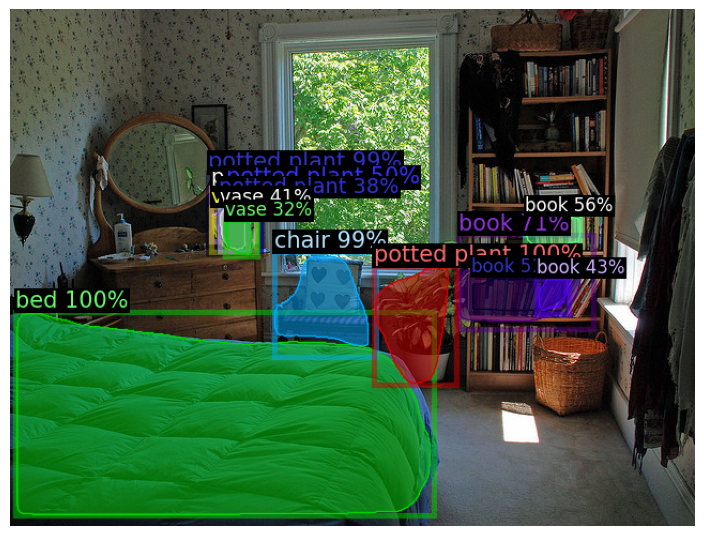

In [ ]:
import torch
import pytorch_mask_rcnn as pmr

use_cuda = True
dataset = "coco"
ckpt_path = "/content/maskrcnn_coco-50.pth"
data_dir  = "/content/dataset/COCO2017"

device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
if device.type == "cuda":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "val", train=True)
#indices = torch.randperm(len(ds)).tolist()
#d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=False)

model = pmr.maskrcnn_resnet50(True, max(ds.classes) + 1).to(device)
model.eval()
model.head.score_thresh = 0.3

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint

for p in model.parameters():
    p.requires_grad_(False)

iters = 3

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    #target = {k: v.to(device) for k, v in target.items()}

    with torch.no_grad():
        result = model(image)

    pmr.show(image, result, ds.classes, "./image/output{}.jpg".format(i))

    if i >= iters - 1:
        break

# Evaluation - voc

In [20]:
ckpt_path = "/content/maskrcnn_coco-50.pth"
data_dir  = "/content/dataset/COCO2017"
! python eval.py --ckpt-path ckpt_path \
                 --dataset coco \
                 --data-dir data_dir

Namespace(dataset='voc', data_dir='/content/dataset/VOCdevkit/VOC2012', ckpt_path='/content/maskrcnn_voc-50.pth', iters=3, use_cuda=True, results='/content/maskrcnn_results.pth')
cuda: True
available GPU(s): 1
0: {'name': 'Tesla T4', 'capability': [7, 5], 'total_momory': 14.75, 'sm_count': 40}

device: cuda
Namespace(dataset='voc', data_dir='/content/dataset/VOCdevkit/VOC2012', ckpt_path='/content/maskrcnn_voc-50.pth', iters=3, use_cuda=True, results='/content/maskrcnn_results.pth')
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`